# Basic Neural Network example

#### Import the relevant libraries

In [1]:
# numpy contains all the mathematical operations and it is fast
# mpl_toolkits.mplot3d can plot the 3D graphs

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Generate random input data to train on

1. Create with random data as rerunning the code will always yield different inputs, but the model will remain the same.

2. This step in not apart of the machine learning algorithm.

3. Essentially we will create fake data with a linear relationship.

4. In real life, we would normally load the data from some external source.

In [2]:
# observations will contain the size of the dataset we want to generate

observations = 1000

# we are about to create a two variabel linear model, f(x,z) = ax + bz + c
# it draws a random value from a specified interval where each number has an equal chance of being selected
# require three arguments, the lowest point of the interval, the highest point of the interval, size is actually the shape in which we want to generate the data
# according to the theory, the appropriate size is the number of observations by the number of variables
# so the xs and zs is the two input variables we will feed to the algorithm

xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# combine them in one matrix called inputs, as theory suggested the inputs matrix will be of shape the number of observations by the number of variables or 1000 by 2
# it literally stacks the observations into a matirx, this result in a matrix with dimensions 1000 by 2

inputs = np.column_stack((xs,zs))

# dimensionality is very important in linear algebra
# we can only multiply matrices that are compatible
# we want to make sure we can multiply x * w, since the linear model relies on that

print(inputs.shape)

(1000, 2)


#### Create the targets we will aim at

In [3]:
# targets = f(x,z) = 2x - 3z + 5 + noise, completely arbitrarily chosen, can try different numbers
# conceptually, the algorithm must learn this is the function
# so the weight is 2 and -3, the bias is 5
# wondering about the noise, it is introduced to randomize our data a bit
# real data always contains noise, it's never perfect
# introducing some small noise will make the data a bit random
# yet the underlying linear relationship will be retained

noise = np.random.uniform(-1, 1, (observations,1))


# the target values will be given according to the function we wanted
# the xs is 1000 by 1
# the zs is 1000 by 1
# the bias is scalar
# the noise is 1000 by 1
# so the targets is 1000 by 1

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


#### Plot the training data

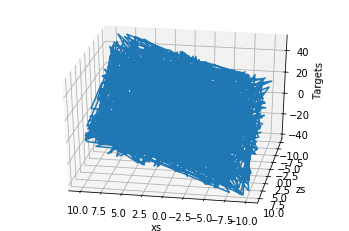

In [4]:
# in order to use the 3D plot, the objects should have a certain shape, so reshape the a targets
# the proper method to use is reshape and takes a arguments the dimensions in which we want to fit the object
# use this method, the targets shape becomes (1000,)

targets = targets.reshape(observations,)

# declare the figure

fig = plt.figure()

# a method allowing us to create the 3D plot

ax = fig.add_subplot(111, projection = '3d')

# choose the axes

ax.plot(xs, zs, targets)

# set labels

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# can fiddle with the azim parameter to plot the data from different angles, just change the value of azim = 100
# to azim = 0 ; azim = 200, or whatever

ax.view_init(azim = 100)

plt.show()

# in order to plot the graph, so reshape the shape
# so reshape the targets back to the shape

targets = targets.reshape(observations,1)

#### Initialize variables

In [5]:
# that will the be the radius of the range real use to initialize the weights and the bias

init_range = 0.1

# the initial weights and biases will be picked randomly from the interval [-0.1,0.1]
# the size of the weights matrix is 2 by 1, we have two variables, so there are two weights one for each input variable and a single output

weights = np.random.uniform(low = -init_range, high = init_range, size = (2, 1))

# the bias appropriate shape is 1 by 1, so the bias is a scalar
# in machine learning, there are as many biases, as there are outputs

biases = np.random.uniform(low = -init_range, high = init_range, size = 1)

# there are small and close to zero
# the two is weights and the third is bias

print(weights)
print(biases)

[[-0.04242688]
 [-0.09145016]]
[-0.03520622]


#### Set a learning rate

In [6]:
# this learning rate is useful for this demonstration

learning_rate = 0.02

#### Train the model

Vary the weights and biases so the outputs are closet to the targets.

In [7]:
# since this is an iterative problem, so it need to create a loop
# this loop will apply update rule and calculate the loss function
# for each loop, it will calculate outputs, compare outputs to targets through the loss function, print the loss for each iteration so can know how to do it, finally adjust weights and biases 

for i in range(100):
    
    # the inputs is 1000 by 1, the weights is 2 by 1, so the outputs is 1000 by 1
    # the biases, python adds scalar to matrices element-wise, that's exactly what we want
    # so this means it is added to each element of the output matrix
    
    outputs = np.dot(inputs, weights) + biases
    
    # deltas is records the difference between outputs and targets
    # python actually speaking deltas is a 1000 by 1 array
    
    deltas = outputs - targets
    
    # calculate the loss, it will use L2-norm loss / 2
    # the L2-norm is sum of the deltas ^ 2 / 2
    # divided the observations cna give the average loss per observations or the mean loss
    # no matter divided by 2 or divided by the observations, this doesn't change the logic of the loss function
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # we print the loss at each step, as we want to keep an eye on whether it is decreasing as iterations are performed
    # if it is decreasing, the machine learning algorithm functions well
    
    print(loss)
    
    # it must update the weights and biases so they are ready for the next iteration
    
    deltas_scaled = deltas / observations
    
    # it will following the gradient descent logic
    # the shape of weights is 2 by 1
    # the shpape of inputs is 1000 by 2
    # the deltas_sclaled is 1000 by 1
    # so it can not simply multiply the inputs and the deltas
    # this is an issue that may arise occasionally due to the linear algebra involved to fix it
    # using the transposing, the shape of inputs becomes 2 by 1000
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled) 
    
    # the result is a list of numbers that appears to be in descending order
    # these are values of our average loss function
    # it start from a high value and at each iteration it became lower and lower until it reached a point where it almost stop changing
    # this means we have minimized (for almost minimized) the loss function with respect to the weights and biased
    # therefore we have found a linear function that fits the model well
    # the weights and the biases are optimize but so are the outputs
    # in the memory of the computer, the variables weights, biases and outputs contain their optimized values, those from the last iteration of the loop

220.70986844330963
36.18247097597086
14.559718495838126
11.669344187856794
10.947801031035397
10.490965152863003
10.079345439800486
9.687120928647527
9.310761042741055
8.949320730153941
8.602173622562352
8.26875047428898
7.9485082660164
7.640925873399008
7.345502822454841
7.061758429600593
6.789231014279177
6.527477147154937
6.276070928540275
6.034603295406287
5.802681355795474
5.579927749547156
5.365980034294787
5.160490095736032
4.963123581216011
4.773559355702148
4.5914889792653995
4.416616205217662
4.248656498088832
4.0873365706591915
3.9323939392937772
3.7835764968553103
3.640642102500693
3.5033581876936655
3.37150137779259
3.2448571285975705
3.1232193772656283
3.0063902070258712
2.8941795251491347
2.7864047536481262
2.6828905322048047
2.5834684328416277
2.4879766858724075
2.396259916686874
2.3081688929406696
2.2235602817394096
2.1422964164217517
2.064245072561992
1.9892792528277126
1.9172769803424312
1.8481211002170534
1.7816990889271573
1.7179028712259767
1.6566286442951932
1.59

#### Print weights and biases and see if we have worked correctly

In [8]:
# the biases is close to five as we wanted but not really
# that's because we use too few iterations or an inappropriate learning rate
# can try different number of ovservations, learning rate, number of iterations and the initial range for initializing weights and biases

print(weights, biases)

[[ 2.00270916]
 [-2.99503639]] [4.32099761]


#### Plot last outputs vs targets

Since they are the last ones at the end of training, they represent the final model accuracy, the closer this plot it to a 45 degree line, the closer targets and outputs values are.

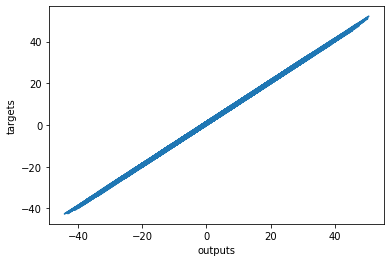

In [9]:
plt.plot(outputs, targets)

plt.xlabel('outputs')
plt.ylabel('targets')

plt.show()